In [2]:
import pandas as pd
import json

with open("./usage_data.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [3]:
df.columns

Index(['transport_type', 'request_id', 'model', 'model_latency', 'prompt',
       'prompt_length', 'prompt_token_count', 'completion_length',
       'completion_token_count', 'response', 'tags', 'error',
       'request_start_time', 'request', 'workspace_id', 'api_key_uuid'],
      dtype='object')

In [4]:
df['request_start_time']

0       2025-01-04 11:49:03.230555+00:00
1       2025-01-04 11:48:42.406599+00:00
2       2025-01-04 11:46:42.139931+00:00
3       2025-01-04 11:46:15.051745+00:00
4       2025-01-04 11:44:52.075126+00:00
                      ...               
5929    2024-08-18 16:17:09.606278+00:00
5930    2024-08-18 15:49:32.659171+00:00
5931    2024-08-18 15:49:10.220265+00:00
5932    2024-08-18 13:13:59.342681+00:00
5933    2024-08-18 13:13:54.877882+00:00
Name: request_start_time, Length: 5934, dtype: object

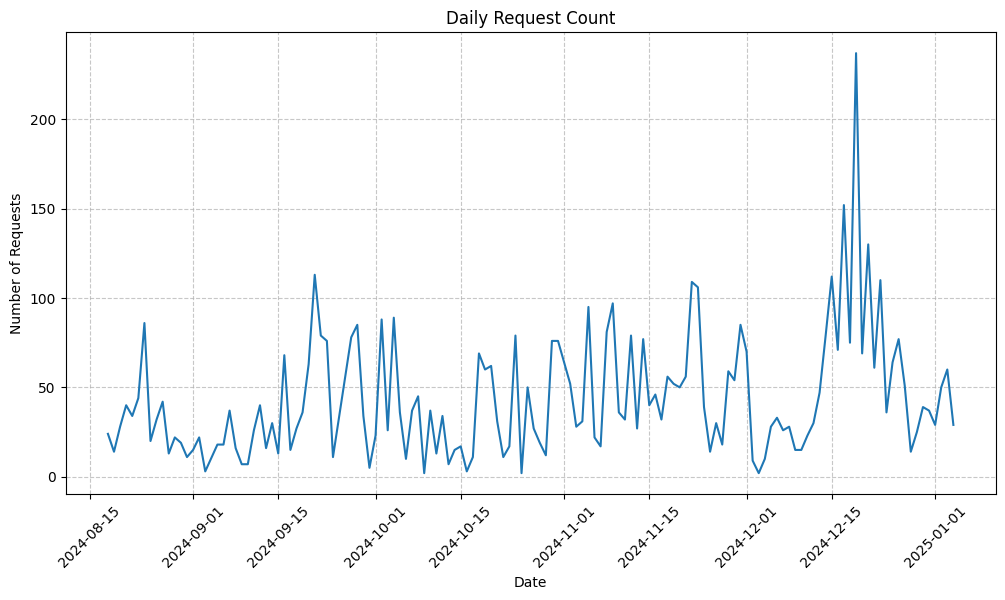

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert request_start_time to datetime if it's not already
df['request_start_time'] = pd.to_datetime(df['request_start_time'])

# Create a date column (without time)
df['date'] = df['request_start_time'].dt.date

# Group by date and count the requests
daily_counts = df.groupby('date').size().reset_index(name='count')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_counts, x='date', y='count')

# Customize the plot
plt.title('Daily Request Count')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
